# Tutorial 3: Simulating Random Walks

© 2018 Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

--- 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
%matplotlib inline

In this tutorial, we will learn how to write a stochastic simulation through coin flips and explore the deep connection to diffusion. 

##  What is a stochastic simulation?

In science, we are often more interested in the distribution of a set of outcomes rather than a single event. This may be the probability distribution of a molecule diffusing a specific distance as a function of time, the distribution of mRNA molecules per cell produced from a constitutively expressing promoter, or the probability distribution of a model parameter given a collection of data. Stochastic simulations allow us to generate a series of simulations of a system in which one step (such as the direction a molecule will diffuse) is governed by random chance. These simulations often boil down to flipping a coin to dictate if said step will occur or not.

Of course, sitting in your office chair flipping a two Euro coin over and over again is not how one should do a simulation. To get a sense of the probability distribution of some outcome, we often have to simulate the process thousands of times. This means that we need to know how to make our computers do the heavy lifting.

It's often easy to forget just how powerful modern computers can be. What once required a serious computational cluster only twenty years ago can now be done on a 10 mm thick compartment made of rose-gold colored aluminium. In the following exercise, we will demonstate how you can learn about the behavior of biological systems from the comfort of your laptop in only half a screen of code.


## How do we flip coins?

Think of a molecule that moves either left or right with equal step probabilities at each subsequent time point. We can decide whether to walk left or right by flipping a coin and seeing if it comes up 'heads' or 'tails'. We can do this by using the pseudo random number generator that comes along with `numpy`.

In [8]:
# Flip a coin three times.
flip_1 = np.random.rand()
flip_2 = np.random.rand()
flip_3 = np.random.rand()
print(flip_1, flip_2, flip_3)

0.23542190963815623 0.519337118014271 0.3690635473787227


Note that this will change every time that we run the code cell. How do we convert this to a 'heads' and 'tails' readout? We can assume that this is a totally fair coin. This means that the probability of getting "heads" to come up $P_H$ is the same as flipping a "tails" $P_T$ such that $P_H + P_T  = 1$. This means that for a fair coin, $P_H = P_T = 0.5$. To convert our coin flips above, we simply have to test if the flip is above or below 0.5. If it is below, we'll say that the coin was flipped "heads", otherwise, it is "tails".

In [9]:
# Convert our coinflips to heads and tails.
flips = [flip_1, flip_2, flip_3]
for flip in flips:
    if flip < 0.5:
        print("Heads")
    else: 
        print("Tails")

Heads
Tails
Heads


Now imagine that we wanted to flip the coin one thousand times. Obviously, we shouldn't write out a thousand variables and then loop through them. We could go through a loop for one thousand times and flip a coin at each step or flip one thousand coins at once and store them in an array. In the interest of simplicity, we'll go with option one. Let's flip a coin one thousand times and compute the probability of getting "heads".

In [10]:
# Test that our coin flipping algorithm is fair.
n_flips = 1000  # That's a lot of flips!
p = 0.5  # Our anticipated probability of a heads.

# Flip the coin n_flips times.
flips = np.random.rand(n_flips)

# Compute the number of heads.
heads_or_tails = flips < p  # Will result in a True (1.0) if heads.
n_heads = np.sum(heads_or_tails)  # Gives the total number of heads.

# Compute the probability of a heads in our simulation.
p_sim = n_heads / n_flips
print('Predicted p = %s. Simulated p = %s.' %(p, p_sim))

Predicted p = 0.5. Simulated p = 0.493.


In the above code cell, we've also introduced a way to format strings using the %s formatter. We can specify that a value should inserted at that position (`%`) as a string (`s`) by providing a tuple of the values after the string in the order they should be inserted prefixed by a "magic" operator `%`. Note that these strings are inserted in the order in which they appear in the tuple.

We see that our simulated probability is very close to our imposed $P_H$, but not exactly. This is the nature of stochastic simulations. It's based on repeated random draws. If we were to continue to flip a coin more times, our simulated $P_H$ would get closer and closer to 0.5. This is why doing many repetitions of stochastic simulations is necessary to generate reliable statistics.


## Random Walks and Diffusion

So far, we've learned how to flip coins *in silico*, but how does this relate to diffusion? As we discussed in class, we can think of a freely diffusing particle a s a particle taking a random walk through space. In the absence of other forces, such as flow, convection, or magnetic fields, this particle should have an equal probability of walking in any direction. 


Rather then just believing me, let's try to simulate this for a particle taking a one-dimensional random walk.We'll start at position zero and flip a coin at each time step. If it is less than 0.5, we'll take a step left. Otherwise, we'll take a step to the right. At each time point, we'll keep track of our position and then plot our trajectory.

In [11]:
# Define our step probability and number of steps.
step_prob = 0.5  # Can step left or right equally.
n_steps = 1000   # Essentially time.

# Set up a vector to store our positions. 
position = np.zeros(n_steps)  # Full of zeros.

# Loop through each time step.
for i in range(1, n_steps):
    # Flip a coin.
    flip = np.random.rand()
    
    # Figure out which way we should step.
    if flip < step_prob:
        step = -1  # To the 'left'.
    else:
        step = 1  # to the 'right'.
        
    # Update our position based off of where we were in the last time point. 
    position[i] = position[i-1] + step

Notice that at the beginning of our for loop, we specified our range to be from 1 to `n_steps`. This is because the first entry (index `0`) of our position vector is our starting position. Since we update our position at timepoint `i` based off of where we were at time step `i - 1`, we have to start at index `1`.

Now that we've taken the random walk, let's plot it. We'll take a look at where our molecule was at each time point.


Text(0, 0.5, 'position')

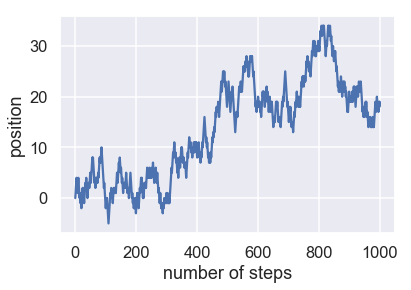

In [12]:
# Make a vector of time points.
steps = np.arange(0, n_steps, 1)  # Arange from 0 to n_steps taking intervals of 1.

# Plot it!
plt.plot(steps, position)
plt.xlabel('number of steps')
plt.ylabel('position')


Again, since our steps are based on the generation of random numbers. This trajectory will change every time you run the code. As we discussed earlier, the power of stochastic simulation comes from doing them many times over. Let's write our random walk code again one thousand times and plot all of the traces. 

In [288]:
# Perform the random walk 1000 times. 
n_simulations = 1000

# Make a new position vector. This will include all simulations.
position = np.zeros((n_simulations, n_steps))

# Redefine our step probability just to be clear. 
step_prob = 0.5

# Loop through each simulation.
for i in range(n_simulations):
    # Loop through each step. 
    for j in range(1, n_steps):
        # Flip a coin.
        flip = np.random.rand()
        
        # Figure out how to step.
        if flip < step_prob:
            step = -1
        else:
            step = 1
            
        # Update our position.
        position[i, j] = position[i, j-1] + step

You'll notice that this cell took a little bit longer to run than the previous one. This is because we are doing the simulation a thousand times over! To show the random walks, we'll plot all of the trajectories over each other as thin lines with a transparency (`alpha`) on each to get a sense of the distribution.



Text(0, 0.5, 'position')

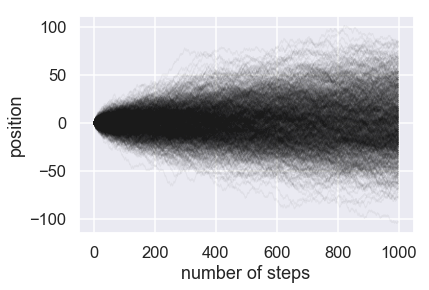

In [289]:
# Plot all of the trajectories together.
for i in range(n_simulations):
    # Remembering that `position` is just a two-dimensional matrix that is 
    # n_simulations by n_steps, we can get each step for a given simulation 
    # by indexing as position[i, :].
    plt.plot(steps, position[i, :], color='k', linewidth=1, alpha=0.05) 
    
# Add axis labels.
plt.xlabel('number of steps')
plt.ylabel('position')

Pretty cool! We can look at the distribution of positions at various steps in time by making histograms of the positions of each simulation. Let's take a look at the distribution of positions at $t=200$ steps.

(-100, 100)

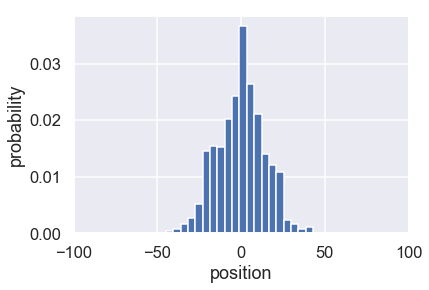

In [290]:
# Make a histogram of the positions. To look at t=200, we have to index at 
# 199 because indexing starts at 0  in Python. We'll also normalize the 
# histogram (density=True) so we can get a measure of probability.
plt.hist(position[:, 199], bins=20, density=True)
plt.xlabel('position')
plt.ylabel('probability')

# Set the xlimits to cover the entire range. 
plt.xlim([-100, 100])

We see that this qualitatively appears to be Gaussian. If we had to guess, we could say that the mean looks like it is right at about zero. Let's take a look at the distribution of positions at the last time point as well.

(-100, 100)

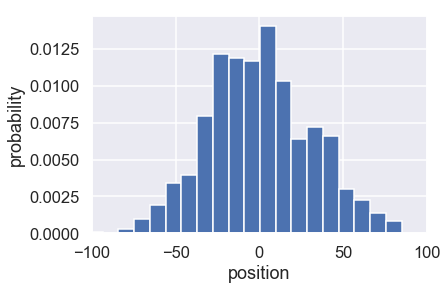

In [291]:
# Make a histogram of the position distribution at the last time step. We could
# just index at 999, but indexing at -1 will always return the distribution at
# the last time step, whatever that may be. 
plt.hist(position[:, -1], bins=20, density=True)
plt.xlabel('position')
plt.ylabel('probability')
plt.xlim([-100, 100])

Again, this distribution looks somewhat Gaussian with a mean of approximately zero. We can actually compute the mean position from our simulation by iterating through each time step and simply computing the mean. Let's plot the mean at each time point as a red line.

Text(0, 0.5, 'position')

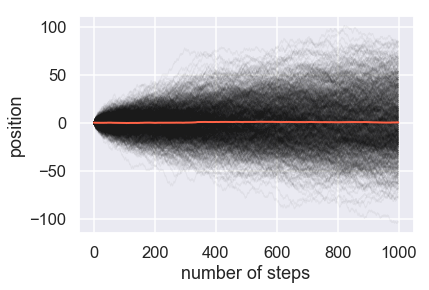

In [292]:
# Compute the mean position at each step and plot it. 
mean_position = np.zeros(n_steps)
for i in range(n_steps):
    mean_position[i] = np.mean(position[:, i])

# Plot all of the simulations.
for i in range(n_simulations):
    plt.plot(steps, position[i, :], color='k', linewidth=1, alpha=0.05)
    
# Plot the mean as a thick red line. 
plt.plot(steps, mean_position, color='tomato', linewidth=2)

# Add the labels.
plt.xlabel('number of steps')
plt.ylabel('position')

As we learned in class, this is exactly what would expect for a random walk with no coinflipping bias. We also learned that the mean squared displacement of a walker from the starting position should scale linearly with the number of steps. We can calculate this directly from our simulation with ease. 

Text(0, 0.5, 'mean square displacement')

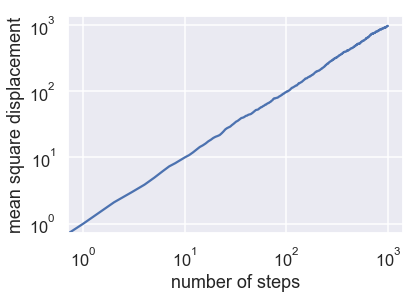

In [293]:
# Compute the mean squared displacement.
msd = np.zeros(n_steps)
for i in range(n_steps):
    msd[i] = np.mean(position[:, i]**2)

# Plot the mean squared as a function of the number of steps.
plt.loglog(steps, msd)
plt.xlabel('number of steps')
plt.ylabel('mean square displacement')


## Diffusion Across A Synapse

We can do more than just simulate a freely diffusing particle using random number generation. While the examples are nearly endless, we can examine an example discussed in class $--$ diffusion across a neural synapse. From our discussion, we learned that the time $t$ it takes for a particle to diffuse a given distance $L$ scales as

$$
t = {L^2 \over D}, \tag{1}
$$

for a one-dimensional case. Here, $D$ is the diffusion coefficient and typically has the units of µm$^2$ per second. For small molecules such as the neuotransmitter Acetylcholine, the diffusion constant is several hundred square microns per second. Taking a diffusion constant of 500 µm$^2$/sec and a neural synapse 30 nm wide, it would take *on average* justThus, for a neural synapse with a width of approximately 30 nm, the *average* neurotransmitter around 1.8 µs to diffuse. However, this represents just the *mean* time to diffuse and not the full distribution. While we could solve for the full distribution, we can just as easily simulate the phenomenon and plot the distribution. 

Before we can jump right into the simulation, we must define a few parameters. As we will be taking discrete steps in time, we will need to determine how wide our synapse is in terms of single steps. To set the distance of a single step, we will need to set the time resolution of our simulation. As we are measuring very short times (µs), we should take very short steps in time, such as a nanosecond. 

In [22]:
# Describe the synapse and neurotransmitter
D = 500 # Diffusion constant in sq. um per sec 
L = 0.03  # Width of the neurotransmitter.

# Set the time step
dt = 1E-9 # in sec (one nanosecond)

# Given Eq. 1, compute the distance traveled (on average) in
# a single time step
L_dt = np.sqrt(D * dt)

# Determine how many steps there are across the whole synapse.
length = int(L / L_dt)

This simulation is a little more sophisticated than our unrestricted random walk. Rather than starting at a position and walking randomly into space, our neurotransmitter is released from a source (the sending neuron) and is absorbed by another boundary (the receiving neuron). This imposes two hard limits on our simulation. First, a neurotransmitter is not allowed to diffuse back into the source neuron. This means that if we end up back at position zero, we **must** take a step forward. The second constraint is that the simulation should only end when the neurotransmitter reaches the receiving neuron. We don't *a priori* know how long this will take and will therefore need to run the simulation until this condition is met. Let's jump into it!

In [28]:
# To keep track of our current position
position = 0 

# To keep track of how many steps we've taken so far. 
n_steps = 0
    
# To keep track of how many steps it took to reach the neuron.
steps_needed = 0
# While we haven't hit the receiving neuron
while steps_needed == 0: 
    # If we are at the receiving neuron, record the number of steps
    if position == length:
        steps_needed = n_steps
        # If this block is executed, the simulation ends.
        
    # If we are back at the source, there is only one way to move
    elif position == 0:
        # Move to the right, the only sensical direction
        # Note that a += 1 is the same as a = a + 1
        position += 1
        
        # Update how many steps we've taken so far
        n_steps += 1
    # Otherwise, flip a coin.
    else: 
        flip = np.random.rand()
        
        # If < 0.5, step to the  right
        if flip < 0.5:
            position += 1
        
        # Other wise, step to the left.
        else:
            position -= 1
        
        # Update how many steps we've taken so far.
        n_steps += 1
        
# Print how long it took us to reach the end. 
print('It took %.2f µs to cross the synapse!' %(steps_needed * dt * 1E6))

It took 2.82 µs to cross the synapse!


As we run this simulation over and over again, we see that we can get quite varied answers! To get a sense of the distribution, we will need to run this simulation thousands of times and keep track of the number of steps needed. We can take the code from above and stick it in another loop to run many simulations

In [33]:
# Define the number of simulations 
num_sim = 5000 

# Instantiate an empty vector to keep track of the number of steps taken so far. 
steps_needed = np.zeros(num_sim)

# Loop through each simulation. 
for i in range(num_sim):
    # Reset our position and n_steps counter. 
    position = 0
    n_steps = 0
    
    # Run the same simulation as before. 
    while steps_needed[i] == 0: 
        if position == length:
            steps_needed[i] = n_steps
        elif position == 0:
            position += 1
            n_steps += 1
        else: 
            flip = np.random.rand() 
            if flip < 0.5:
                position += 1 
            else:
                position -= 1 
            n_steps += 1 
            
# Convert the steps to time (µs). 
time_to_cross = steps_needed * dt * 1E6

Now, let's plot the distribution! 

Text(0, 0.5, 'counts')

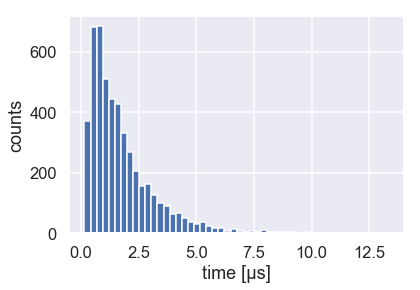

In [35]:
# Plot the distribution. 
plt.hist(time_to_cross, bins=50)
plt.xlabel('time [µs]')
plt.ylabel('counts')

We see quite a degree of diversity in the time it takes to diffuse across the synapse! For some particles, it can take around 10 µs while others seem to get there in around 10 nanoseconds! But what about the mean? Does it match our expectation of 1.8 µs?

In [36]:
print('On average, it took %.1f µs to cross the synapse.' %(np.mean(time_to_cross)))

On average, it took 1.8 µs to cross the synapse.


# In conclusion...

In this tutorial, we've introduced a set of skills that will be useful in whatever field of science you choose to pursue. The ability of writing simulations allows you to get a feeling for the behavior of a physical system without necessarily having to grind through an analytical solution. While we covered only one example of one-dimensional stochastic simulations, these same principles can be applied to many other types questions.
 